**Face_Emotion_Detector**

In [4]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import keras



In [7]:
!pip install Keras-Preprocessing


Defaulting to user installation because normal site-packages is not writeable


In [8]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [9]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'

In [10]:
def createdataframe(dir):
    image_paths =[]
    labels =[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [12]:
train =pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [29]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [16]:
from tqdm.notebook import tqdm

In [17]:
def extract_features(images):
    features =[]
    for image in tqdm(images):
        img = load_img(image,grayscale =True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48,48,1)
    return features

In [18]:
train_features =extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\avd4t\AppData\Roaming\Python\Python310\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [20]:
x_train =train_features/255.0
x_test =test_features/255.0

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
Le = LabelEncoder()
Le.fit(train['label'])

LabelEncoder()

In [23]:
y_train = Le.transform(train['label'])
y_test = Le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train, num_classes =7)
y_test = to_categorical(y_test, num_classes=7)

In [27]:
model = Sequential()
#convolution layers 
model.add(Conv2D(128, kernel_size=(3,3), activation ='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


C:\Users\avd4t\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 696ms/step - accuracy: 0.2349 - loss: 1.8391 - val_accuracy: 0.2596 - val_loss: 1.7848
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 158s 697ms/step - accuracy: 0.2534 - loss: 1.7912 - val_accuracy: 0.3181 - val_loss: 1.6699
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 176s 777ms/step - accuracy: 0.3248 - loss: 1.6694 - val_accuracy: 0.4232 - val_loss: 1.4743
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 741ms/step - accuracy: 0.4004 - loss: 1.5173 - val_accuracy: 0.4598 - val_loss: 1.4238
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 722ms/step - accuracy: 0.4409 - loss: 1.4442 - val_accuracy: 0.4897 - val_loss: 1.3210
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 720ms/step - accuracy: 0.4666 - loss: 1.3886 - val_accuracy: 0.5239 - val_loss: 1.2584
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 723ms/step - accuracy: 0.4814 - loss: 1.3464 - val_accuracy: 0.5286 - val_loss: 1.2502
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 720ms/step - accuracy: 

KeyboardInterrupt: 

The model epochs checked for 28/100 for which 60.29% accuracy found as seen above 

In [30]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [31]:
from keras.models import model_from_json

In [72]:
json_file = open("emotiondetector.json", "r", encoding="utf-8")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [73]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [74]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [75]:
image = 'images/train/sad/63.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
model prediction is  sad


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  sad


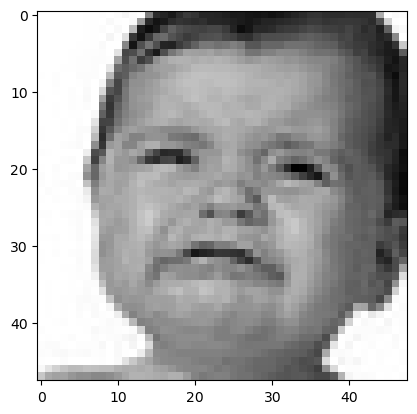

In [77]:
image = 'images/train/sad/63.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  fear


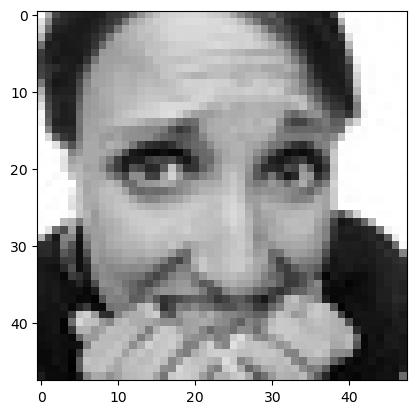

In [78]:
image = 'images/train/fear/372.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  disgust


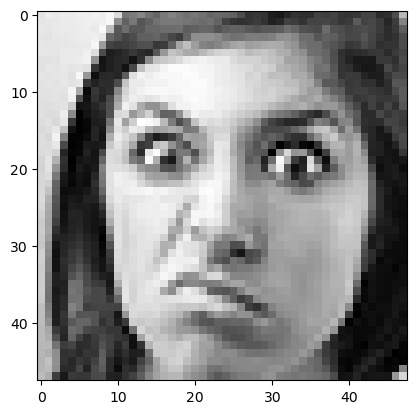

In [79]:
image = 'images/train/disgust/1265.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  happy


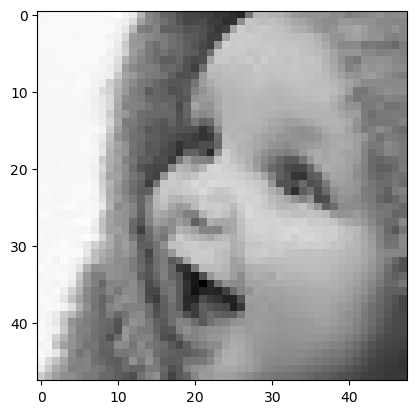

In [80]:
image = 'images/train/happy/64.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  surprise


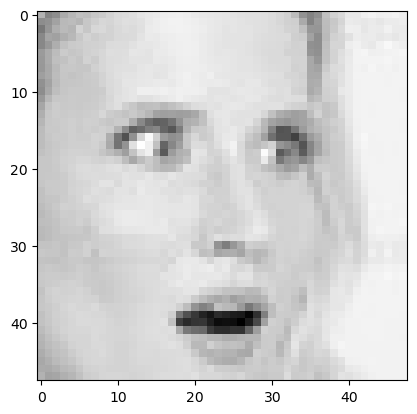

In [81]:
image = 'images/train/surprise/61.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  angry


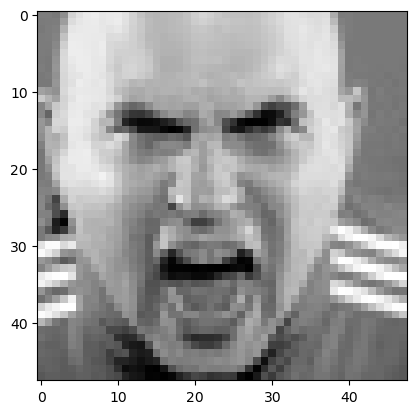

In [82]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  neutral


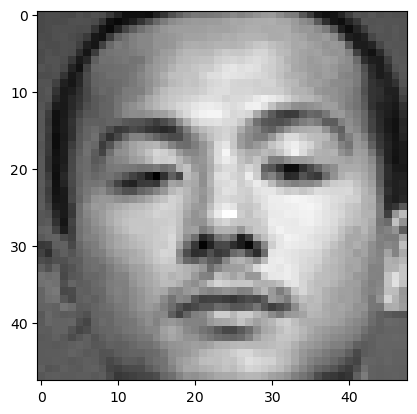

In [83]:
image = 'images/train/neutral/226.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

**Conclusion:- The Created Model tested for sample images used for testing and found its working and identifying the images emotions correctly.**